# Data Analysis of extracted data

This notebook contains the code that was used to analyze the extracted data and generate the plots included in the paper.

#### Import libraries and load extracted data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/extracted_data/extracted_data.csv")

PLOT_PATH = "../plots"

#### Helper functions

In [2]:
def get_all_values(column):
    """ Splits single values consisting of multiple values (e.g "smartphone, tablet") to multiple values
    (e.g. "smartphone", "tablet" )"""
    items = column.str.split(", ", expand = False)
    return pd.DataFrame([item for list_ in items for item in list_])

def get_level(value, level=1):
    """ Sets level for values.
    Example: speed/plt/s
    level 1: speed
    level 2: speed/plt
    level 3: speed/plt/s """
    diff_levels = value.split("/")
    return "/".join(diff_levels[:level+1])

# What is measured?
What is the main aspect that the study aims to quantify?

In [3]:
main_aspects = get_all_values(df["code_measured"])
print(main_aspects.value_counts())

speed           16
enerconsum      14
bandwidth        4
cacheperform     2
memconsum        2
dtype: int64


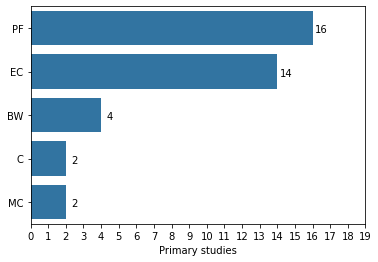

In [4]:
plt.rcParams.update({'font.size': 10}) # Set plot font size.
g = sns.countplot(y=0, orient="h", data=main_aspects, order=["speed", "enerconsum", 
                                                             "bandwidth", "cacheperform", "memconsum"], 
                                                              color='tab:blue')
g.set_xticks(range(20))
g.set_xticklabels(range(20))
g.set_yticks(range(5))

# Please note that we map speed to PF (performance)
g.set_yticklabels(["PF", "EC",  "BW", "C", "MC"])
for p in g.patches:
    height = p.get_width()
    g.text(height + 0.5, p.get_y()+0.5, height ,ha="center")
g.set(ylabel="", xlabel="Primary studies" )
plt.savefig(f"{PLOT_PATH}/characteristics.pdf",
           dpi=300, bbox_inches='tight')

# What metrics are used?

In [5]:
used_metrics = get_all_values(df["code_metrics"])
possible_aspects = main_aspects[0].unique()

for aspect in possible_aspects:
    print(aspect)
    if aspect=="speed":
        # While we have a lot of different versions of speed/plt (some use s, ms etc.) count them as one.
        print(used_metrics[used_metrics[0].str.startswith(aspect)][0].str.split("/")
              .str[:2].str.join("/").value_counts())
    else:
        print(used_metrics[used_metrics[0].str.startswith(aspect)].value_counts())


memconsum
memconsum/mb           1
memconsum/pss/ratio    1
dtype: int64
speed
speed/plt              8
speed/si               4
speed/tti              2
speed/lt               2
speed/latency          2
speed/relative(plt)    1
speed/tbt              1
speed/fci              1
speed/mttw             1
speed/lighthouse       1
speed/ds               1
speed/fmp              1
speed/lttw             1
speed/responsetime     1
speed/fp               1
speed/fr               1
speed/ttfb             1
speed/bd               1
speed/eil              1
speed/fcp              1
Name: 0, dtype: int64
enerconsum
enerconsum/joules      10
enerconsum/relative     2
enerconsum/mAs          1
enerconsum/mVs          1
dtype: int64
cacheperform
cacheperform/actualcache     1
cacheperform/cacheability    1
cacheperform/hr/ratio        1
cacheperform/nh              1
cacheperform/nm              1
cacheperform/ph              1
cacheperform/pm              1
dtype: int64
bandwidth
bandwidth/bytes   

# What data analysis techniques are used?

In [6]:
stats = get_all_values(df["code_dataanalysis"])
stats.value_counts()

descstats    28
hyptest      10
effsize       5
correlana     4
predmod       3
dtype: int64

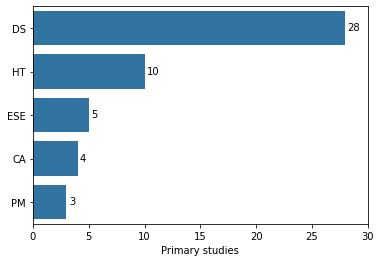

In [7]:
plt.rcParams.update({'font.size': 10})
g = sns.countplot(y=0, orient="h", data=stats, order=stats[0].value_counts().index, color='tab:blue',)
g.set_yticks(range(5))
g.set_yticklabels(["DS", "HT", "ESE", "CA", "PM"])

g.set(xlabel="Primary studies", ylabel="")
for p in g.patches:
    height = p.get_width()
    if height == 28 or height == 10:
        g.text(height + 0.75, p.get_y()+0.45, height ,ha="center")
    else:
        g.text(height + 0.5, p.get_y()+0.45, height ,ha="center")
g.set(xlim=(0, 30))

plt.savefig(f"{PLOT_PATH}/data_analysis.pdf",
dpi=300, bbox_inches='tight')

# How many studies provide a replication package of some sort?

In [8]:
reppack = df["code_reppackage"].value_counts()
print(reppack)

no                            20
yes/code_data_instructions     5
yes/code_data                  2
yes/code                       1
Name: code_reppackage, dtype: int64


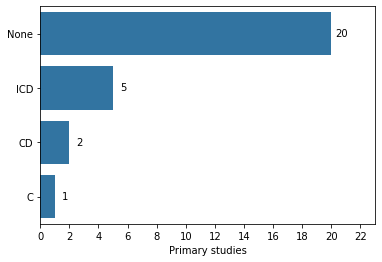

In [9]:
plt.rcParams.update({'font.size': 10})
g = sns.countplot(y="code_reppackage", orient="h", data=df, 
                  order = df['code_reppackage'].value_counts().index, color="tab:blue")

xlabels = list(range(0,23,2))
g.set_xticks(xlabels) 

g.set_xticklabels(xlabels)
g.set_yticks(range(4))
g.set_yticklabels(["None", "ICD", "CD", "C"])


g.set(xlabel="Primary studies", ylabel="")
for p in g.patches:
    height = p.get_width()
    g.text(height + 0.7, p.get_y()+0.45, height ,ha="center")
g.set(xlim=(0, 23))

plt.savefig(f"{PLOT_PATH}/reppackage.pdf",
dpi=300, bbox_inches='tight')

# Platform characteristics
## What types of devices are used?

In [10]:
device_types = get_all_values(df["code_platform"])
device_types.value_counts()

smartphone    20
emulation      6
tablet         4
dtype: int64

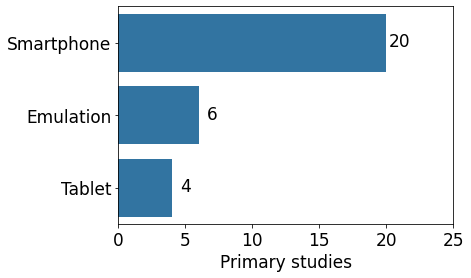

In [11]:
plt.rcParams.update({'font.size': 17})

g = sns.countplot(y=0, orient="h", data=device_types, order=["smartphone", 'emulation', "tablet"], 
                  color="tab:blue")


g.set_yticks(range(3))
g.set_yticklabels(["Smartphone", "Emulation", "Tablet" ])


g.set(xlabel="Primary studies", ylabel="") # You can comment this line out if you don't need title
for p in g.patches:
    height = p.get_width()
    g.text(height + 1, p.get_y()+0.45, int(height) ,ha="center")
g.set(xlim=(0, 25))

plt.savefig(f"{PLOT_PATH}/devicetype.pdf",
dpi=300, bbox_inches='tight')



## OS Distribution

In [12]:
oses = get_all_values(df["code_os"])
oses = oses[0].apply(get_level, level=0)
oses = oses.value_counts()
print(oses)

adroid     38
emu         6
ios         2
symbian     1
maemo       1
Name: 0, dtype: int64


Lets classify the maemo and symbian OS as "other" and remove the emulated devices.

In [13]:
oses = oses.drop(["emu", "symbian", "maemo"])
oses["other"] = 2
oses

adroid    38
ios        2
other      2
Name: 0, dtype: int64

/home/omar/Desktop/litstudy/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


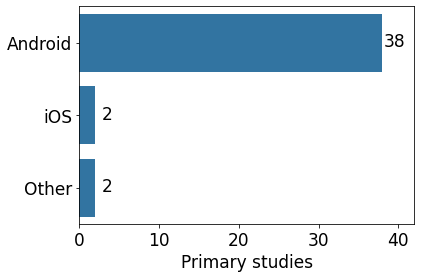

In [14]:
plt.rcParams.update({'font.size': 17})

g = sns.barplot(oses.values, oses.index, color="tab:blue")

g.set_yticks(range(3))
g.set_yticklabels(["Android", "iOS", "Other"])


g.set(xlabel="Primary studies", ylabel="") # You can comment this line out if you don't need title
for p in g.patches:
    height = p.get_width()
    g.text(height + 1.5, p.get_y()+0.45, int(height) ,ha="center")
g.set(xlim=(0, 42))

plt.savefig(f"{PLOT_PATH}/os.pdf",
dpi=300, bbox_inches='tight')

## Browser distribution

In [15]:
browsers = get_all_values(df["code_browser"])
names = browsers[0].apply(get_level, level=0)
names = names.value_counts()

Since there is one paper that tested a large number of different browsers and versions (24 browsers
that fall into the category other) we add them to other.

In [16]:
cleaned_names = names.drop(["emu", "other*24", "opera"])
cleaned_names["other"] = 31
print(cleaned_names)

chrome          13
firefox          8
modified         7
other           31
safari           2
not provided     1
Name: 0, dtype: int64


/home/omar/Desktop/litstudy/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


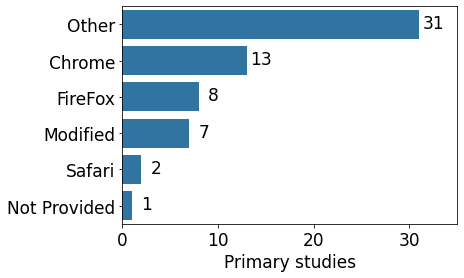

In [17]:
plt.rcParams.update({'font.size': 17})
cleaned_names = cleaned_names.sort_values(ascending=False)
g = sns.barplot(cleaned_names.values, cleaned_names.index, color="tab:blue")


g.set_yticks(range(6))
g.set_yticklabels(["Other", "Chrome", "FireFox", "Modified", "Safari", "Not Provided"])

g.set(xlabel="Primary studies", ylabel="")
for p in g.patches:
    height = p.get_width()
    g.text(height + 1.5, p.get_y()+0.5, int(height) ,ha="center")
g.set(xlim=(0, 35))

plt.savefig(f"{PLOT_PATH}/browser.pdf",
dpi=300, bbox_inches='tight')

# Website characteristics
## Website type distribution

In [18]:
df["code_sitestype"].value_counts()

real               15
real, synthetic     9
synthetic           4
Name: code_sitestype, dtype: int64

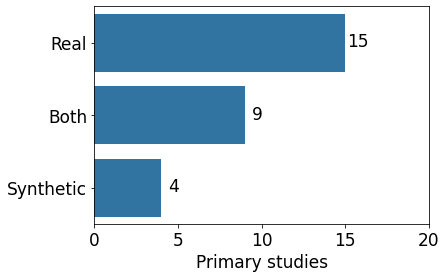

In [19]:
plt.rcParams.update({'font.size': 17})

g = sns.countplot(y="code_sitestype", orient="h", data=df, order = df['code_sitestype'].value_counts().index, color="tab:blue")

g.set_yticks(range(3))
g.set_yticklabels(["Real", "Both", "Synthetic"])

g.set(xlabel="Primary studies", ylabel="") # You can comment this line out if you don't need title
for p in g.patches:
    height = p.get_width()
    g.text(height + .75, p.get_y()+0.45, int(height) ,ha="center")
g.set(xlim=(0, 20))

plt.savefig(f"{PLOT_PATH}/sitetype.pdf", dpi=300, bbox_inches='tight')


## Selection sources distribution


In [20]:
df["code_sitesingle"].value_counts()
site_source = get_all_values(df["code_sitesingle"]).value_counts()
print(site_source)

alexa          14
nosource        6
selfcreated     4
list            3
benchmarks      1
preprovided     1
scraped         1
dtype: int64


We remove the self created websites from this list since we don't look at synthethic sites here. Next we group the preprovided, scraped and benchmark sites into one group called "other".

In [21]:
site_source = site_source.drop(["selfcreated", "scraped", "benchmarks", "preprovided"])
site_source["realother"] = 3
site_source["list"] = 3
print(site_source)

alexa        14
nosource      6
list          3
realother     3
dtype: int64


/home/omar/Desktop/litstudy/venv/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/home/omar/Desktop/litstudy/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


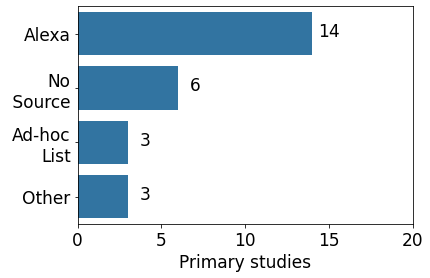

In [22]:
plt.rcParams.update({'font.size': 17})
site_source.index = ["Alexa", "No Source", "Ad-hoc List", "Other"]
g = sns.barplot(site_source.values, site_source.index, color="tab:blue")

g.set_yticks(range(4))
g.set_yticklabels(["Alexa", "No\n Source", "Ad-hoc\nList", "Other"])

g.set(xlabel="Primary studies", ylabel="") # You can comment this line out if you don't need title
for p in g.patches:
    height = p.get_width()
    g.text(height + 1.0, p.get_y()+0.45, int(height) ,ha="center")
g.set(xlim=(0, 20))

plt.savefig(f"{PLOT_PATH}/sitetype.pdf",
dpi=300, bbox_inches='tight')


## Hosting distribution


In [23]:
hosted = df["code_siteshosted"].value_counts()
hosted

original          16
mirrored           7
not applicable     4
not provided       1
Name: code_siteshosted, dtype: int64

Don't take into account the 4 papers using synthethic websites...

In [24]:
hosted = hosted.drop(["not applicable"])

/home/omar/Desktop/litstudy/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


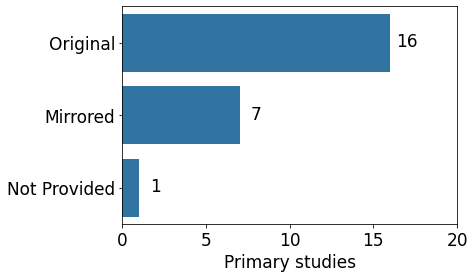

In [25]:
plt.rcParams.update({'font.size': 17})

g = sns.barplot(hosted.values, hosted.index, color="tab:blue")


g.set_yticks(range(3))
g.set_yticklabels(["Original", "Mirrored", "Not Provided",])

g.set(xlabel="Primary studies", ylabel="") # You can comment this line out if you don't need title
for p in g.patches:
    height = p.get_width()
    g.text(height + 1.0, p.get_y()+0.45, int(height) ,ha="center")
g.set(xlim=(0, 20))

plt.savefig(f"{PLOT_PATH}/sitehosting.pdf",
dpi=300, bbox_inches='tight')

## Number of websites

In [26]:
df[["Title", "code_nrsites"]]

,Title,code_nrsites
0,Mobile Web Browsing Under Memory Pressure,100
1,Web Browser Workload Characterization for Powe...,6
2,Privacy as a proxy for Green Web browsing: Met...,notprovided
3,An Energy Efficiency Study of Web-Based Commun...,3
4,Investigating the Correlation between Performa...,21
5,Why are Web Browsers Slow on Smartphones?,20
6,From 6.2 to 0.15 seconds – an Industrial Case ...,1
7,The Web for Underpowered Mobile Devices: Lesso...,50
8,Demystifying the Imperfect Client-Side Cache P...,146
9,Performance Analysis of Web-browsing Speed in ...,3


We remove the paper that did not provide the nr of subjects. In addition, to keep the plot readable, we only show the papers that use less than 150 subjects.

In [27]:
copy = df.copy()

# Remove paper that does not provide data.
copy = copy.drop([2])

copy["code_nrsites"] = copy["code_nrsites"].astype("int")
print("Subjects NOT included in plots")
print(copy[(copy["code_nrsites"]) > 150]["code_nrsites"])
plotthis = copy[(copy["code_nrsites"]) < 151]

Subjects NOT included in plots
10    95728
11      337
15     8528
17      470
20      400
25      200
Name: code_nrsites, dtype: int64


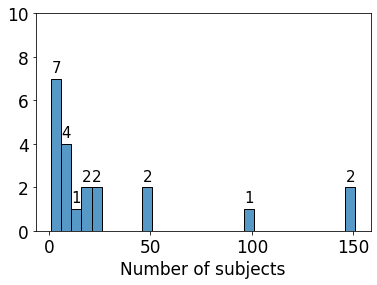

In [28]:
plt.rcParams.update({'font.size': 17})

copy["code_nrsites"] = copy["code_nrsites"].astype(float)
g = sns.histplot(data=plotthis, x="code_nrsites", color="tab:blue", binwidth=5)

g.set(xlabel="Number of subjects", ylabel="")
for p in g.patches:
    height = p.get_height()
    if height != 0:
        g.text(p.get_x()+p.get_width()/2., height+0.3, height, ha="center", fontsize=15)
g.set(ylim=(0, 10))

plt.savefig(f"{PLOT_PATH}/nrsites.pdf",
dpi=300, bbox_inches='tight')

## Subjects provided distribution

In [29]:
df["code_sitesprovided"].value_counts()

Yes          14
No           10
synthetic     4
Name: code_sitesprovided, dtype: int64

# Scope distribution



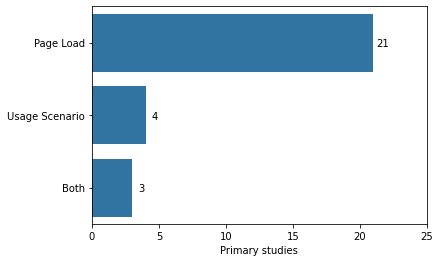

In [30]:
plt.rcParams.update({'font.size': 10})
g = sns.countplot(y="code_scope", orient="h", data=df, order = df['code_scope'].value_counts().index, color="tab:blue")

g.set_yticks(range(3))
g.set_yticklabels(["Page Load", "Usage Scenario", "Both"])


g.set(xlabel="Primary studies", ylabel="")
for p in g.patches:
    height = p.get_width()
    if height == 26:
        g.text(height + 0.75, p.get_y()+0.45, height ,ha="center")
    else:
        g.text(height + 0.7, p.get_y()+0.45, height ,ha="center")
g.set(xlim=(0, 25))

plt.savefig(f"{PLOT_PATH}/scope.pdf",
dpi=300, bbox_inches='tight')


# Focus distribution

In [31]:
df["code_focus"].value_counts()

all           24
javascript     4
Name: code_focus, dtype: int64

# Network condition distribution



In [32]:
networkconditions = get_all_values(df["code_networkcondition"])
networkconditions.value_counts()

wifi(real)           12
3g(real)              8
not provided          6
ethernet(real)        3
4g(emu)               2
4g(real)              2
wifi(emu)             2
2g(emu)               1
3g(emu)               1
GPRS(real)            1
ethernet(emu)         1
lte(real)             1
simulated             1
simulated 4 times     1
dtype: int64

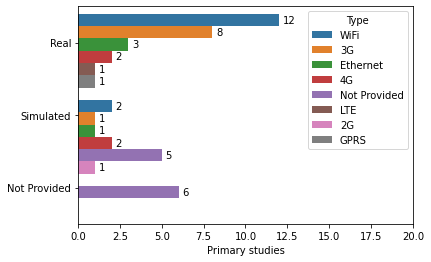

In [33]:
plt.rcParams.update({'font.size': 10})
d = {'category': ["Real", "Real", "Real", "Simulated", 
                  "Real", "Simulated", "Simulated", "Real", 
                  "Simulated", "Simulated", "Simulated", "Not Provided", "Real"],
     'Type': ["WiFi", "3G", "Ethernet", "WiFi", "4G", "4G", 
              "Not Provided", "LTE", "Ethernet", "3G", "2G", "Not Provided", "GPRS"],
     'occurrences': [12, 8, 3, 2, 2,2, 5, 1, 1, 1,1, 6, 1 ]}

newdf = pd.DataFrame(data=d)
g= sns.barplot(x="occurrences",
            y="category",
            hue="Type",
            data=newdf,
               )

import math
import numpy as np
g.set(xlabel="Primary studies", ylabel="")

g.patches.sort(key=lambda x: x.get_y(), reverse=False)

final = []
for p in g.patches:
    if np.isfinite(p.get_width()):
       final.append(p)

g.patches = final
start = -0.4
increment = 0.17
for i, p in enumerate(g.patches):
    p.set_height(.17)
    p.set_y(start)
    if i == 5 or i == 11:
        start = start + increment*2
    else:
        start = start + increment
    if p.get_width() == 12:
        g.text(p.get_width() + 0.60, p.get_y() + 0.125, 
               int(p.get_width()),ha="center", fontdict={'size': 10,})
    else:
        g.text(p.get_width() + 0.42, p.get_y() + 0.125, 
               int(p.get_width()),ha="center", fontdict={'size': 10,})


g.set(xlim=(0, int(20)))

plt.savefig(f"{PLOT_PATH}/network.pdf",
dpi=300, bbox_inches='tight')



# Browser cache use distribution

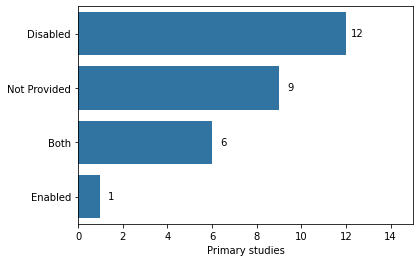

In [34]:
g = sns.countplot(y="code_caching", orient="h", data=df, 
                  order = df['code_caching'].value_counts().index, color="tab:blue")

g.set_yticks(range(4))
g.set_yticklabels(["Disabled", "Not Provided", "Both", "Enabled"])

g.set(xlabel="Primary studies", ylabel="")
for p in g.patches:
    height = p.get_width()
    if height == 26:
        g.text(height + 0.75, p.get_y()+0.45, height ,ha="center")
    else:
        g.text(height + 0.5, p.get_y()+0.45, height ,ha="center")
g.set(xlim=(0, 15))

plt.savefig(f"{PLOT_PATH}/caching.pdf",
dpi=300, bbox_inches='tight')




# Found challenges by the papers during research

In [35]:
challenges = get_all_values(df["code_challenges"])
challenges.value_counts()

low generalizability           16
not provided                    9
limitations of used metrics     6
measurement errors              6
controlled                      1
problems during experiment      1
dtype: int64